##### 분류<br><br>ImageNet Database에는 1,400만장의 이미지가 20,000개 이상의 범주로 분류돼 있다. 각 사진에는 명확한 하나의 범주가 정해져 있는 것이다.<br>ImageNet Database중 일부를 사용해 이미지의 범주를 분류하는 대회인 ILSVRC에서는 2012년 딥러닝 기반의 CNN이 등장한 이후 정확도가 크게 상승했다. 2017년에는 거의 100%에 가까운 정확도를 달성했기 때문에 이 대회는 더 이상 열리지 않고 있다.<br><br>분류 문제에는 명확한 정답이 있는 경우도 있지만 그렇지 않은 경우도 있다. 예를 들어 개인정보가 가려진 신용카드 사용 정보로 비슷한 유형의 구매자 군집을 분류하는 문제도 분류 문제의 일종이다. 이것은 정답이 없기 때문에 비지도학습(Unsupervised Learning)이라고 불린다. 9장의 AutoEncoder에서 이에 관한 좀 더 자세한 내용을 다룰 것이다. 

##### Red wine과 White wine을 색깔정보없이 데이터 숫자만 보고 이항분류해보자

In [3]:
import pandas as pd
red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

In [4]:
print(red.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [5]:
print(white.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

In [7]:
# 현재는 red와 white 두 DataFrame으로 데이터가 분리돼 있기 때문에 각각이 어떤 와인인지 나탸내주는 type을 추가한다.
# 그후에 두개의 DataFrame을 하나로 합친다.

red['type'] = 0
white['type'] = 1

wine = pd.concat([red, white], axis=0)  # row-wise concatenation
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [8]:
wine.type.value_counts()

1    4898
0    1599
Name: type, dtype: int64

In [9]:
print(wine.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

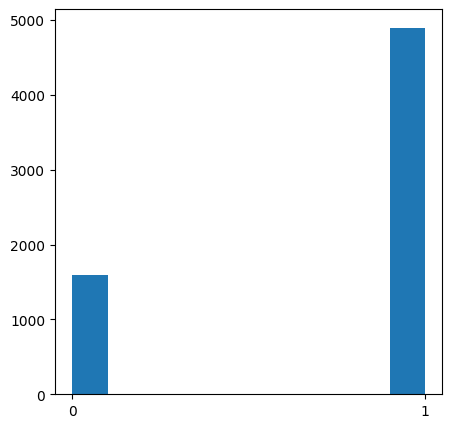

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
plt.hist(wine['type'])
plt.xticks([0, 1])
plt.show()

In [14]:
# 딥러닝학습을 위해 데이터를 훈련데이터와 테스트데이터로 나누기 전에 레드와인과 화이트와인이 비슷한 비율로 들어가도록
# 데이터를 한번 랜덤하게 섞어야 한다. 한 범주의 데이터 양이 매우 많거나 매우 적다면 섞기 전에 일정한 비율의 데이터가
# 훈련데이터와 테스트데이터에 모두 들어갈 수 있도록 다른 처리가 필요하겠지만 3:1 정도의 비율은 이러한 고려없이
# 랜덤하게 섞어도 거의 문제가 없다.
# 또한 데이터를 섞기 전에 데이터 정규화 작업도 반드시 해야 한다. 
# min, max를 이용해서 데이터 정규화를 하였다.

wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
print(wine_norm.describe().round(4))

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count      6497.0000         6497.0000    6497.0000       6497.0000   
mean          0.2823            0.1731       0.1919          0.0743   
std           0.1071            0.1098       0.0875          0.0730   
min           0.0000            0.0000       0.0000          0.0000   
25%           0.2149            0.1000       0.1506          0.0184   
50%           0.2645            0.1400       0.1867          0.0368   
75%           0.3223            0.2133       0.2349          0.1150   
max           1.0000            1.0000       1.0000          1.0000   

       chlorides  free sulfur dioxide  total sulfur dioxide    density  \
count  6497.0000            6497.0000             6497.0000  6497.0000   
mean      0.0781               0.1025                0.2529     0.1463   
std       0.0582               0.0616                0.1302     0.0578   
min       0.0000               0.0000                0.0000     

In [15]:
# 정규화된 데이터를 랜덤하게 섞고 학습을 위해 numpy array로 변경하자.
import numpy as np

wine_shuffle = wine_norm.sample(frac=1)
wine_np = wine_shuffle.to_numpy()
print(wine_np[:5])

[[0.25619835 0.15333333 0.19277108 0.01533742 0.0448505  0.11458333
  0.24884793 0.06882591 0.36434109 0.12921348 0.49275362 0.66666667
  1.        ]
 [0.19834711 0.08       0.15060241 0.2208589  0.07641196 0.02430556
  0.26267281 0.20358589 0.36434109 0.1741573  0.23188406 0.5
  1.        ]
 [0.28099174 0.17333333 0.18072289 0.1196319  0.06976744 0.13541667
  0.37096774 0.2014652  0.58914729 0.2247191  0.24637681 0.33333333
  1.        ]
 [0.14876033 0.27333333 0.07831325 0.05981595 0.04983389 0.05555556
  0.25345622 0.06921149 0.54263566 0.38202247 0.82608696 0.66666667
  1.        ]
 [0.37190083 0.08       0.44578313 0.05904908 0.05813953 0.11111111
  0.28571429 0.10198573 0.41085271 0.11235955 0.60869565 0.5
  1.        ]]


In [16]:
# 이제 훈련데이터와 테스트데이터로 나눠보자. 검증데이터는 훈련데이터에서 자동으로 만들 예정이다.
import tensorflow as tf
train_idx = int(len(wine_np) * 0.8)
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]

In [17]:
print(len(train_X), len(train_Y), len(test_X), len(test_Y))

5197 5197 1300 1300


In [18]:
# tf.keras.utils.to_categorical은 분류문제에서 자주 사용되는 함수로, 정답행렬을 one-hot encoding방식으로 바꾼다.
# one-hot encoding은 정답에 해당하는 인덱스의 값에는 1을 넣고, 나머지 인덱스에는 모두 0을 넣는 방식이다.
# to_categorical의 두번째 인수인 num_classes는 정답클래스의 개수이다. 지금은 2이다.
# 이렇게 정답의 인코딩 방식을 바꾼 결과 0.0은 [1, 0]으로 1.0은 [0, 1]로 바뀐 것을 알 수 있다.

train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=2)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=2)
print(train_Y[0], test_Y[0])

[0. 1.] [0. 1.]
